In [4]:
pip install ijson

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import json
import ijson
import time
from datetime import datetime
from datetime import timezone
from zoneinfo import ZoneInfo

In [2]:
data = pd.read_json("/Users/hkannan/Downloads/twitter-1mb.json")

In [3]:
data

,total_rows,offset,rows
0,185875709,0,"{'id': '1406813874750300166', 'key': [2021, 6,..."
1,185875709,0,"{'id': '1406814402272137216', 'key': [2021, 6,..."
2,185875709,0,"{'id': '1406920780328312832', 'key': [2021, 6,..."
3,185875709,0,"{'id': '1406929052724654084', 'key': [2021, 6,..."
4,185875709,0,"{'id': '1406932228165099530', 'key': [2021, 6,..."
...,...,...,...
995,185875709,0,"{'id': '1406973646577438723', 'key': [2021, 6,..."
996,185875709,0,"{'id': '1406987309690482689', 'key': [2021, 6,..."
997,185875709,0,"{'id': '1406955275370729480', 'key': [2021, 6,..."
998,185875709,0,"{'id': '1407119087780565000', 'key': [2021, 6,..."


In [7]:
def time_interval(time):
    time = int(time)
    if time==0:
        return f'{12-time}am - {time+1}am'
    elif time==11:
        return f'{time}am - {time+1}pm'
    elif time==12:
        return f'{time}pm - {time-12+1}pm'
    elif time>12 and time<23:
        return f'{time-12}pm - {time-12+1}pm'
    elif time==23:
        return f'{time-12}pm - {time-12+1}am'
    else:
        return f'{time}am - {time+1}am'

def date_time(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H:%M:%S')

def date(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d')

def hour(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H')

In [43]:
# Streaming Approach with ijson package (reading data by each row)

In [29]:
def happiest_hour(data):
    if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment'])==float):
        if hour(data['doc']['data']['created_at']) in happy_hour_dict:
            happy_hour_dict[hour(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
        else:
            happy_hour_dict[hour(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

In [30]:
def happiest_day(data):
    if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment'])==float):
        if date(data['doc']['data']['created_at']) in happy_date_dict:
            happy_date_dict[date(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
        else:
            happy_date_dict[date(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

In [26]:
def most_active_hour(data):
    if data != {}:
        if hour(data['doc']['data']['created_at']) in mtweets_hour_dict:
            mtweets_hour_dict[hour(data['doc']['data']['created_at'])] += 1
        else:
            mtweets_hour_dict[hour(data['doc']['data']['created_at'])] = 1

In [27]:
def most_active_day(data):
    if data != {}:
        if date(data['doc']['data']['created_at']) in mtweets_date_dict:
            mtweets_date_dict[date(data['doc']['data']['created_at'])] += 1
        else:
            mtweets_date_dict[date(data['doc']['data']['created_at'])] = 1

In [ ]:
"""
import time
import ijson
from datetime import datetime
from datetime import timezone
from zoneinfo import ZoneInfo
from mpi4py import MPI
start_time = time.time()

comm = MPI.COMM_WORLD
size = MPI.COMM_WORLD.Get_size()
rank = MPI.COMM_WORLD.Get_rank()

def time_interval(time):
    time = int(time)
    if time==0:
        return f'{12-time}am - {time+1}am'
    elif time==11:
        return f'{time}am - {time+1}pm'
    elif time==12:
        return f'{time}pm - {time-12+1}pm'
    elif time>12 and time<23:
        return f'{time-12}pm - {time-12+1}pm'
    elif time==23:
        return f'{time-12}pm - {time-12+1}am'
    else:
        return f'{time}am - {time+1}am'

def date_time(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H:%M:%S')

def date(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d')

def hour(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H')

def happiest_hour(data):
    if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment']))==float:
        if hour(data['doc']['data']['created_at']) in happy_hour_dict:
            happy_hour_dict[hour(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
        else:
            happy_hour_dict[hour(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

def happiest_day(data):
    if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment']))==float:
        if date(data['doc']['data']['created_at']) in happy_date_dict:
            happy_date_dict[date(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
        else:
            happy_date_dict[date(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

def most_active_hour(data):
    if data != {}:
        if hour(data['doc']['data']['created_at']) in mtweets_hour_dict:
            mtweets_hour_dict[hour(data['doc']['data']['created_at'])] += 1
        else:
            mtweets_hour_dict[hour(data['doc']['data']['created_at'])] = 1

def most_active_day(data):
    if data != {}:
        if date(data['doc']['data']['created_at']) in mtweets_date_dict:
            mtweets_date_dict[date(data['doc']['data']['created_at'])] += 1
        else:
            mtweets_date_dict[date(data['doc']['data']['created_at'])] = 1

happy_hour_dict = {}
happy_date_dict = {}
mtweets_hour_dict = {}
mtweets_date_dict = {}

with open("/home/harishk/twitter-100gb.json") as f:
    data = ijson.items(f,"rows.item")
    #data_list = list(data)

#chunk_size = len(data_list) // size
#start_index = rank * chunk_size
#end_index = start_index + chunk_size if rank != size - 1 else len(data_list)

#for i in data_list[start_index:end_index]:
    for ind,i in enumerate(data):
        if ind%size==rank:
            happiest_hour(i)
            happiest_day(i)
            most_active_hour(i)
            most_active_day(i)

happy_hour_dict = comm.gather(happy_hour_dict, root=0)
happy_date_dict = comm.gather(happy_date_dict, root=0)
mtweets_hour_dict = comm.gather(mtweets_hour_dict, root=0)
mtweets_date_dict = comm.gather(mtweets_date_dict, root=0)
   
if rank == 0:
    
    hhour_dict = {}
    for j in happy_hour_dict:
        for key,value in j.items():
            if key in hhour_dict:
                hhour_dict[key] += value
            else:
                hhour_dict[key] = value
        
    hdate_dict = {}
    for j in happy_date_dict:
        for key,value in j.items():
            if key in hdate_dict:
                hdate_dict[key] += value
            else:
                hdate_dict[key] = value

    mhour_dict = {}
    for j in mtweets_hour_dict:
        for key,value in j.items():
            if key in mhour_dict:
                mhour_dict[key] += value
            else:
                mhour_dict[key] = value

    mdate_dict = {}
    for j in mtweets_date_dict:
        for key,value in j.items():
            if key in mdate_dict:
                mdate_dict[key] += value
            else:
                mdate_dict[key] = value

    # happiest hour ever in the data
    happy_hour_dict = dict(sorted(hhour_dict.items()))
    happy_hour_dict = max(happy_hour_dict.items(), key=lambda k: k[1])
    print(f'The happiest hour ever is between {time_interval(happy_hour_dict[0].split()[1])} on {datetime.fromisoformat(happy_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with an overall sentiment score of {happy_hour_dict[1]}')

    # happiest day ever in the data
    happy_date_dict = dict(sorted(hdate_dict.items()))
    happy_date_dict = max(happy_date_dict.items(), key=lambda k: k[1])
    print(f'{datetime.fromisoformat(happy_date_dict[0]).strftime("%d %B, %Y")} was the happiest day with an overall sentiment score of {happy_date_dict[1]}')

    # most active hour ever
    mtweets_hour_dict = dict(sorted(mhour_dict.items()))
    mtweets_hour_dict = max(mtweets_hour_dict.items(), key=lambda k: k[1])
    print(f'The most active hour ever is between {time_interval(mtweets_hour_dict[0].split()[1])} on {datetime.fromisoformat(mtweets_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with {mtweets_hour_dict[1]} tweets')

    # most active day ever
    mtweets_date_dict = dict(sorted(mdate_dict.items()))
    mtweets_date_dict = max(mtweets_date_dict.items(), key=lambda k: k[1])
    print(f'{datetime.fromisoformat(mtweets_date_dict[0]).strftime("%d %B, %Y")} was the most active day with with {mtweets_date_dict[1]} tweets')
    print("--- %s seconds ---" % (time.time() - start_time))
"""

In [32]:
start_time = time.time()
happy_hour_dict = {}
happy_date_dict = {}
mtweets_hour_dict = {}
mtweets_date_dict = {}

with open("/Users/hkannan/Downloads/twitter-1mb.json") as f:
    data = ijson.items(f,"rows.item")
    for i in data:
        happiest_hour(i)
        happiest_day(i)
        most_active_hour(i)
        most_active_day(i)
        
# happiest hour ever in the data
happy_hour_dict = dict(sorted(happy_hour_dict.items()))
happy_hour_dict = max(happy_hour_dict.items(), key=lambda k: k[1])
print(f'The happiest hour ever is between {time_interval(happy_hour_dict[0].split()[1])} on {datetime.fromisoformat(happy_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with an overall sentiment score of {happy_hour_dict[1]}')
# happiest day ever in the data
happy_date_dict = dict(sorted(happy_date_dict.items()))
happy_date_dict = max(happy_date_dict.items(), key=lambda k: k[1])
print(f'{datetime.fromisoformat(happy_date_dict[0]).strftime("%d %B, %Y")} was the happiest day with an overall sentiment score of {happy_date_dict[1]}')
# most active hour ever
mtweets_hour_dict = dict(sorted(mtweets_hour_dict.items()))
mtweets_hour_dict = max(mtweets_hour_dict.items(), key=lambda k: k[1])
print(f'The most active hour ever is between {time_interval(mtweets_hour_dict[0].split()[1])} on {datetime.fromisoformat(mtweets_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with {mtweets_hour_dict[1]} tweets')
# most active day ever
mtweets_date_dict = dict(sorted(mtweets_date_dict.items()))
mtweets_date_dict = max(mtweets_date_dict.items(), key=lambda k: k[1])
print(f'{datetime.fromisoformat(mtweets_date_dict[0]).strftime("%d %B, %Y")} was the most active day with with {mtweets_date_dict[1]} tweets')
print("--- %s seconds ---" % (time.time() - start_time))

The happiest hour ever is between 5am - 6am on 21 June, 2021 with an overall sentiment score of 7.850009811067737
21 June, 2021 was the happiest day with an overall sentiment score of 63.15673514357181
The most active hour ever is between 2am - 3am on 21 June, 2021 with 70 tweets
21 June, 2021 was the most active day with with 999 tweets
--- 0.06976890563964844 seconds ---


In [33]:
#Visualization

In [81]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# create and view data
resource = ["1 node & 1 core", "1 node & 8 cores", "2 nodes & 8 cores"]
time_taken = [4459.506200313568, 2359.358896255493, 2441.455066680908]
data = pd.DataFrame(list(zip(resource, time_taken)), 
               columns =['Resource', 'Time taken (in seconds)'])
data

,Resource,Time taken (in seconds)
0,1 node & 1 core,4459.506200
1,1 node & 8 cores,2359.358896
2,2 nodes & 8 cores,2441.455067


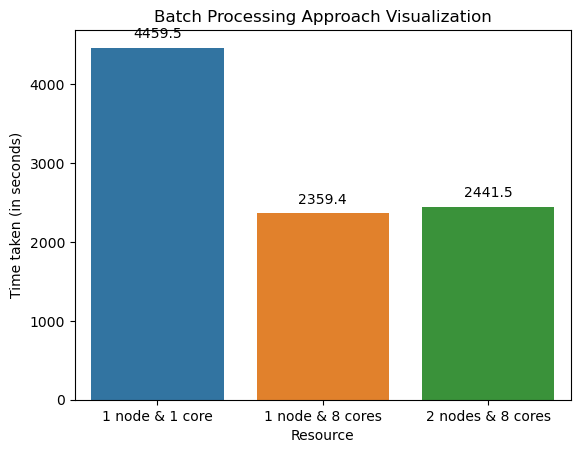

In [82]:
# add a title
ax = sns.barplot(data=data, x='Resource', y='Time taken (in seconds)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Batch Processing Approach Visualization')
plt.show()

In [44]:
# Batch Processing Approach (reading data by chunks -> 50000/chunk)

In [45]:
def cvt_data(a):
    try:
        a = json.loads(str(a[:-2]))
    except:
        a = {}
    return a

In [55]:
def happiest_hour(final_data):
    for data in final_data:
        if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment'])==float):
            if hour(data['doc']['data']['created_at']) in happy_hour_dict:
                happy_hour_dict[hour(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
            else:
                happy_hour_dict[hour(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

In [57]:
def happiest_day(final_data):
    for data in final_data:
        if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment'])==float):
            if date(data['doc']['data']['created_at']) in happy_date_dict:
                happy_date_dict[date(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
            else:
                happy_date_dict[date(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

In [58]:
def most_active_hour(final_data):
    for data in final_data:
        if data != {}:
            if hour(data['doc']['data']['created_at']) in mtweets_hour_dict:
                mtweets_hour_dict[hour(data['doc']['data']['created_at'])] += 1
            else:
                mtweets_hour_dict[hour(data['doc']['data']['created_at'])] = 1

In [59]:
def most_active_day(final_data):
    for data in final_data:
        if data != {}:
            if date(data['doc']['data']['created_at']) in mtweets_date_dict:
                mtweets_date_dict[date(data['doc']['data']['created_at'])] += 1
            else:
                mtweets_date_dict[date(data['doc']['data']['created_at'])] = 1

In [ ]:
"""
import time
import json
from datetime import datetime
from datetime import timezone
from zoneinfo import ZoneInfo
from mpi4py import MPI
start_time = time.time()

comm = MPI.COMM_WORLD
size = MPI.COMM_WORLD.Get_size()
rank = MPI.COMM_WORLD.Get_rank()

def time_interval(time):
    time = int(time)
    if time==0:
        return f'{12-time}am - {time+1}am'
    elif time==11:
        return f'{time}am - {time+1}pm'
    elif time==12:
        return f'{time}pm - {time-12+1}pm'
    elif time>12 and time<23:
        return f'{time-12}pm - {time-12+1}pm'
    elif time==23:
        return f'{time-12}pm - {time-12+1}am'
    else:
        return f'{time}am - {time+1}am'

def date_time(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H:%M:%S')

def date(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d')

def hour(date_time):
    Melbourne_tzone = ZoneInfo("Australia/Melbourne")
    d = datetime.fromisoformat(
    date_time[:-1]
    ).astimezone(Melbourne_tzone)

    return d.strftime('%Y-%m-%d %H')

def cvt_data(a):
    try:
        a = json.loads(str(a[:-2]))
    except:
        a = {}
    return a

def happiest_hour(final_data):
    for data in final_data:
        if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment']))==float:
            if hour(data['doc']['data']['created_at']) in happy_hour_dict:
                happy_hour_dict[hour(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
            else:
                happy_hour_dict[hour(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

def happiest_day(final_data):
    for data in final_data:
        if data != {} and 'sentiment' in data['doc']['data'] and type(data['doc']['data']['sentiment'])!=dict and type(float(data['doc']['data']['sentiment']))==float:
            if date(data['doc']['data']['created_at']) in happy_date_dict:
                happy_date_dict[date(data['doc']['data']['created_at'])] += float(data['doc']['data']['sentiment'])
            else:
                happy_date_dict[date(data['doc']['data']['created_at'])] = float(data['doc']['data']['sentiment'])

def most_active_hour(final_data):
    for data in final_data:
        if data != {}:
            if hour(data['doc']['data']['created_at']) in mtweets_hour_dict:
                mtweets_hour_dict[hour(data['doc']['data']['created_at'])] += 1
            else:
                mtweets_hour_dict[hour(data['doc']['data']['created_at'])] = 1

def most_active_day(final_data):
    for data in final_data:
        if data != {}:
            if date(data['doc']['data']['created_at']) in mtweets_date_dict:
                mtweets_date_dict[date(data['doc']['data']['created_at'])] += 1
            else:
                mtweets_date_dict[date(data['doc']['data']['created_at'])] = 1

happy_hour_dict = {}
happy_date_dict = {}
mtweets_hour_dict = {}
mtweets_date_dict = {}

chunk_size = 50000
with open("/home/sthirumalais/twitter-100gb.json") as f:
    count = 0
    while True:
        #print(count)
        try:
            data = [next(f) for _ in range(chunk_size)]
            data = [cvt_data(i) for i in data]
            if count%size == rank:
                happiest_hour(data)
                happiest_day(data)
                most_active_hour(data)
                most_active_day(data)
            count += 1
            if not data:
                break
        except StopIteration:
            break

happy_hour_dict = comm.gather(happy_hour_dict, root=0)
happy_date_dict = comm.gather(happy_date_dict, root=0)
mtweets_hour_dict = comm.gather(mtweets_hour_dict, root=0)
mtweets_date_dict = comm.gather(mtweets_date_dict, root=0)

#print(happy_hour_dict)
if rank == 0:

    hhour_dict = {}
    for j in happy_hour_dict:
        for key,value in j.items():
            if key in hhour_dict:
                hhour_dict[key] += value
            else:
                hhour_dict[key] = value

    hdate_dict = {}
    for j in happy_date_dict:
        for key,value in j.items():
            if key in hdate_dict:
                hdate_dict[key] += value
            else:
                hdate_dict[key] = value

    mhour_dict = {}
    for j in mtweets_hour_dict:
        for key,value in j.items():
            if key in mhour_dict:
                mhour_dict[key] += value
            else:
                mhour_dict[key] = value

    mdate_dict = {}
    for j in mtweets_date_dict:
        for key,value in j.items():
            if key in mdate_dict:
                mdate_dict[key] += value
            else:
                mdate_dict[key] = value

    # happiest hour ever in the data
    happy_hour_dict = dict(sorted(hhour_dict.items()))
    happy_hour_dict = max(happy_hour_dict.items(), key=lambda k: k[1])
    print(f'The happiest hour ever is between {time_interval(happy_hour_dict[0].split()[1])} on {datetime.fromisoformat(happy_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with an overall sentiment score of {happy_hour_dict[1]}')

    # happiest day ever in the data
    happy_date_dict = dict(sorted(hdate_dict.items()))
    happy_date_dict = max(happy_date_dict.items(), key=lambda k: k[1])
    print(f'{datetime.fromisoformat(happy_date_dict[0]).strftime("%d %B, %Y")} was the happiest day with an overall sentiment score of {happy_date_dict[1]}')

    # most active hour ever
    mtweets_hour_dict = dict(sorted(mhour_dict.items()))
    mtweets_hour_dict = max(mtweets_hour_dict.items(), key=lambda k: k[1])
    print(f'The most active hour ever is between {time_interval(mtweets_hour_dict[0].split()[1])} on {datetime.fromisoformat(mtweets_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with {mtweets_hour_dict[1]} tweets')

    # most active day ever
    mtweets_date_dict = dict(sorted(mdate_dict.items()))
    mtweets_date_dict = max(mtweets_date_dict.items(), key=lambda k: k[1])
    print(f'{datetime.fromisoformat(mtweets_date_dict[0]).strftime("%d %B, %Y")} was the most active day with with {mtweets_date_dict[1]} tweets')
    print("--- %s seconds ---" % (time.time() - start_time))
    """

In [60]:
start_time = time.time()
happy_hour_dict = {}
happy_date_dict = {}
mtweets_hour_dict = {}
mtweets_date_dict = {}

chunk_size = 50
with open("/Users/hkannan/Downloads/twitter-1mb.json") as f:
    count = 0
    while True:
        #print(count)
        try:
            data = [next(f) for _ in range(chunk_size)]
            data = [cvt_data(i) for i in data]
            #if count%size == rank: 
            happiest_hour(data)
            happiest_day(data)
            most_active_hour(data)
            most_active_day(data)
            count += 1
            if not data:
                break
        except StopIteration:
            break

# happiest hour ever in the data
happy_hour_dict = dict(sorted(happy_hour_dict.items()))
happy_hour_dict = max(happy_hour_dict.items(), key=lambda k: k[1])
print(f'The happiest hour ever is between {time_interval(happy_hour_dict[0].split()[1])} on {datetime.fromisoformat(happy_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with an overall sentiment score of {happy_hour_dict[1]}')
# happiest day ever in the data
happy_date_dict = dict(sorted(happy_date_dict.items()))
happy_date_dict = max(happy_date_dict.items(), key=lambda k: k[1])
print(f'{datetime.fromisoformat(happy_date_dict[0]).strftime("%d %B, %Y")} was the happiest day with an overall sentiment score of {happy_date_dict[1]}')
# most active hour ever
mtweets_hour_dict = dict(sorted(mtweets_hour_dict.items()))
mtweets_hour_dict = max(mtweets_hour_dict.items(), key=lambda k: k[1])
print(f'The most active hour ever is between {time_interval(mtweets_hour_dict[0].split()[1])} on {datetime.fromisoformat(mtweets_hour_dict[0].split()[0]).strftime("%d %B, %Y")} with {mtweets_hour_dict[1]} tweets')
# most active day ever
mtweets_date_dict = dict(sorted(mtweets_date_dict.items()))
mtweets_date_dict = max(mtweets_date_dict.items(), key=lambda k: k[1])
print(f'{datetime.fromisoformat(mtweets_date_dict[0]).strftime("%d %B, %Y")} was the most active day with with {mtweets_date_dict[1]} tweets')
print("--- %s seconds ---" % (time.time() - start_time))

The happiest hour ever is between 5am - 6am on 21 June, 2021 with an overall sentiment score of 7.850009811067737
21 June, 2021 was the happiest day with an overall sentiment score of 63.15673514357181
The most active hour ever is between 2am - 3am on 21 June, 2021 with 70 tweets
21 June, 2021 was the most active day with with 999 tweets
--- 0.06197500228881836 seconds ---


In [61]:
# Visualization

In [73]:
# create and view data
resource = ["1 node & 1 core", "1 node & 8 cores", "2 nodes & 8 cores"]
time_taken = [5776.581069231033, 3690.1105840206146, 3476.475198507309]
data = pd.DataFrame(list(zip(resource, time_taken)), 
               columns =['Resource', 'Time taken (in seconds)'])
data

,Resource,Time taken (in seconds)
0,1 node & 1 core,5776.581069
1,1 node & 8 cores,3690.110584
2,2 nodes & 8 cores,3476.475199


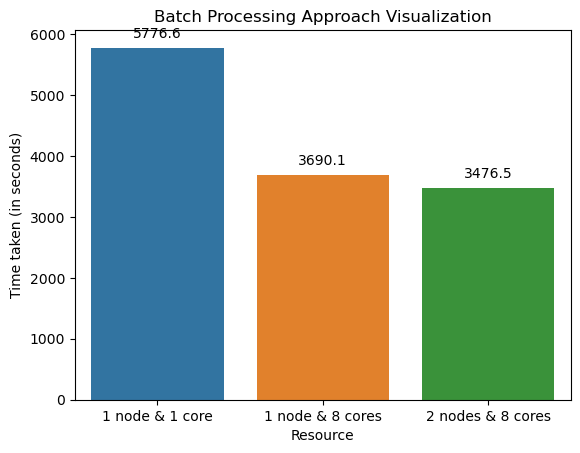

In [80]:
# add a title
ax = sns.barplot(data = data, x = 'Resource', y = 'Time taken (in seconds)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Batch Processing Approach Visualization')
plt.show()

In [1]:
# Comparision of two methods

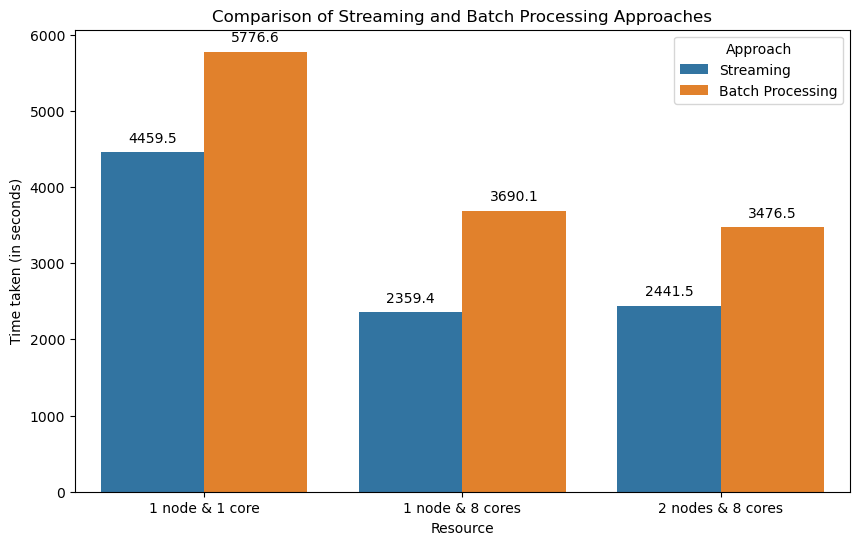

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine data for both approaches
resource = ["1 node & 1 core", "1 node & 8 cores", "2 nodes & 8 cores"]
time_taken_streaming = [4459.506200313568, 2359.358896255493, 2441.455066680908]
time_taken_batch = [5776.581069231033, 3690.1105840206146, 3476.475198507309]

data = pd.DataFrame({
    'Resource': resource * 2,
    'Time taken (in seconds)': time_taken_streaming + time_taken_batch,
    'Approach': ['Streaming'] * len(resource) + ['Batch Processing'] * len(resource)
})

# Plotting
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = data, x = 'Resource', y = 'Time taken (in seconds)', hue = 'Approach')

# Add values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Comparison of Streaming and Batch Processing Approaches')
plt.xlabel('Resource')
plt.ylabel('Time taken (in seconds)')
plt.legend(title='Approach')
plt.show()